In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0)
df.head(4)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [4]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# your code here
tri_state = df['_STATE'].value_counts()
tri_state
tri_state = df

Now check to see how large our subset df.

In [6]:
# your code here
tri_state.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [9]:
df = pd.read_csv('case_study.csv', index_col = 0)
PHEALTH = df[['PHYSHLTH','_STATE']]
print(f'Number of values in PHYSHLTH column initially: {PHEALTH.shape}')

PHEALTH['PHYSHLTH'].replace(to_replace = 88, value = 0, inplace = True) # ones with 88 have not taken any days off
print(f'Number of values after changing values of 88 to 0: {PHEALTH.shape}')

index_of_99 = PHEALTH['PHYSHLTH'].index[PHEALTH['PHYSHLTH'] == 99] # which ones are 99
PHEALTH.drop(index_of_99, 0, inplace = True) # drop those because they refused to answer
print(f'Number of values after removing values of 99: {PHEALTH.shape}')

index_of_77 = PHEALTH['PHYSHLTH'].index[PHEALTH['PHYSHLTH'] == 77] # which indices are 77
PHEALTH.drop(index_of_77, 0, inplace = True) # drop those values because they don't know
print(f'Number of values after removing values of 77: {PHEALTH.shape}')

PHEALTH['PHYSHLTH'].value_counts().sort_index(ascending = True) # make sure all numbers (of days out) are within [1,30]

Number of values in PHYSHLTH column initially: (34545, 2)
Number of values after changing values of 88 to 0: (34545, 2)
Number of values after removing values of 99: (34240, 2)
Number of values after removing values of 77: (33747, 2)


0.0     21296
1.0      1538
2.0      1993
3.0      1187
4.0       622
5.0      1092
6.0       187
7.0       641
8.0        99
9.0        15
10.0      751
11.0        8
12.0       69
13.0       10
14.0      326
15.0      640
16.0       16
17.0       15
18.0       19
19.0       10
20.0      402
21.0       70
22.0       12
23.0        4
24.0        7
25.0      159
26.0        7
27.0       22
28.0       57
29.0       35
30.0     2438
Name: PHYSHLTH, dtype: int64

In [21]:
'''random tests for indexing with conditionals in dataframes'''
a = pd.Series(([77,22,343,5,6,6,7,77,88,989,99]))
b = pd.Series([3,4,5,6,7,8])

print(a.index[ a > 7 ])
print(b[a > 7])

Int64Index([0, 1, 2, 7, 8, 9, 10], dtype='int64')
0    3
1    4
2    5
dtype: int64


## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [45]:
#your code here
'''DONE ABOVE'''


'DONE ABOVE'

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [23]:
# descriptive statistics
PHEALTH.groupby('_STATE').head() #just to see what data looks like now

CONNECTICUT = PHEALTH[PHEALTH['_STATE'] == 9]
NEW_JERSEY = PHEALTH[PHEALTH['_STATE'] == 34]
NEW_YORK = PHEALTH[PHEALTH['_STATE'] == 36]

# plt.hist(CONNECTICUT['PHYSHLTH'], histtype = 'barstacked')
print(CONNECTICUT['PHYSHLTH'].shape)
print(NEW_JERSEY['PHYSHLTH'].shape)
print(NEW_YORK['PHYSHLTH'].shape)
NEW_JERSEY['PHYSHLTH'].value_counts().sort_index(ascending = False) # too make sure graphs reflect the actual data

(10413,)
(11458,)
(11876,)


30.0     942
29.0      12
28.0      22
27.0       8
26.0       3
25.0      58
24.0       4
23.0       2
22.0       5
21.0      27
20.0     134
19.0       4
18.0       6
17.0       6
16.0       8
15.0     218
14.0     108
13.0       2
12.0      25
11.0       2
10.0     261
9.0        7
8.0       31
7.0      237
6.0       65
5.0      316
4.0      207
3.0      399
2.0      575
1.0      461
0.0     7303
Name: PHYSHLTH, dtype: int64

(array([7.303e+03, 4.610e+02, 5.750e+02, 3.990e+02, 2.070e+02, 3.160e+02,
        6.500e+01, 2.370e+02, 3.100e+01, 7.000e+00, 2.610e+02, 2.000e+00,
        2.500e+01, 2.000e+00, 1.080e+02, 2.180e+02, 8.000e+00, 6.000e+00,
        6.000e+00, 4.000e+00, 1.340e+02, 2.700e+01, 5.000e+00, 2.000e+00,
        4.000e+00, 5.800e+01, 3.000e+00, 8.000e+00, 2.200e+01, 9.540e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

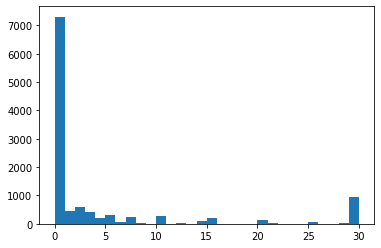

In [46]:
plt.hist(NEW_JERSEY['PHYSHLTH'], bins = 30)

(array([7.214e+03, 5.810e+02, 7.910e+02, 4.690e+02, 2.300e+02, 4.360e+02,
        7.000e+01, 2.300e+02, 4.000e+01, 4.000e+00, 2.760e+02, 4.000e+00,
        2.500e+01, 6.000e+00, 1.230e+02, 2.430e+02, 6.000e+00, 2.000e+00,
        6.000e+00, 3.000e+00, 1.540e+02, 2.100e+01, 2.000e+00, 2.000e+00,
        2.000e+00, 5.700e+01, 3.000e+00, 9.000e+00, 2.000e+01, 8.470e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

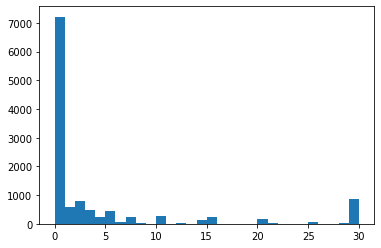

In [47]:
plt.hist(NEW_YORK['PHYSHLTH'], bins = 30)

(array([6.779e+03, 4.960e+02, 6.270e+02, 3.190e+02, 1.850e+02, 3.400e+02,
        5.200e+01, 1.740e+02, 2.800e+01, 4.000e+00, 2.140e+02, 2.000e+00,
        1.900e+01, 2.000e+00, 9.500e+01, 1.790e+02, 2.000e+00, 7.000e+00,
        7.000e+00, 3.000e+00, 1.140e+02, 2.200e+01, 5.000e+00, 0.000e+00,
        1.000e+00, 4.400e+01, 1.000e+00, 5.000e+00, 1.500e+01, 6.720e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

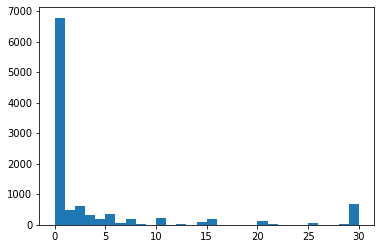

In [48]:
plt.hist(CONNECTICUT['PHYSHLTH'], bins = 30)

In [37]:
CONNECTICUT['PHYSHLTH'].describe()

count    10413.000000
mean         3.688562
std          8.103732
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [38]:
NEW_JERSEY['PHYSHLTH'].describe()

count    11458.000000
mean         4.380957
std          8.923776
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [39]:
NEW_YORK['PHYSHLTH'].describe()

count    11876.00000
mean         4.14803
std          8.44533
min          0.00000
25%          0.00000
50%          0.00000
75%          3.00000
max         30.00000
Name: PHYSHLTH, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x11b854c50>,
 'caps': [<matplotlib.lines.Line2D at 0x11b858710>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b8540d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11b860150>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b860690>],
 'means': []}

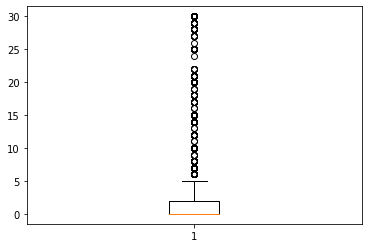

In [41]:
# graphic showing those descriptive stats
fig1, ax1 = plt.subplots()
ax1.boxplot(CONNECTICUT['PHYSHLTH'])  # box plot is not that good because about 80% of people took no days off

In [12]:
# graphic showing the distribution of data

## 3. Generate a graphic that compares the average number of sick days for each state. 

The average number of sick days for Connecticut is: 3.689
The average number of sick days for New Jersey is: 4.381
The average number of sick days for New York is: 4.148


Text(0, 0.5, 'Number of Sick Days')

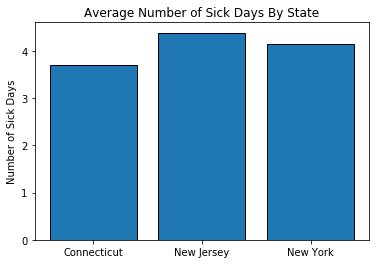

In [107]:
# code to calculate the average number of sick days by state

print(f"The average number of sick days for Connecticut is: {round(CONNECTICUT['PHYSHLTH'].mean(),3)}")
print(f"The average number of sick days for New Jersey is: {round(NEW_JERSEY['PHYSHLTH'].mean(),4)}")
print(f"The average number of sick days for New York is: {round(NEW_YORK['PHYSHLTH'].mean(),4)}")
      
compare_avg = plt.bar(['Connecticut', 'New Jersey', 'New York'], [CONNECTICUT['PHYSHLTH'].mean(), NEW_JERSEY['PHYSHLTH'].mean(), NEW_YORK['PHYSHLTH'].mean()], edgecolor = 'black')
plt.title('Average Number of Sick Days By State')
plt.ylabel('Number of Sick Days')

In [ ]:
# code to graph those averages using matplotlib

# not sure if this makes sense to do but they're asking for it so i did it

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [44]:
# code to create new colum for chronically sick

df = pd.read_csv('case_study.csv', index_col = 0)
PHEALTH = df[['PHYSHLTH','_STATE']]
print(f'Number of values in PHYSHLTH column initially: {PHEALTH.shape}')

PHEALTH['PHYSHLTH'].replace(to_replace = 88, value = 0, inplace = True) # ones with 88 have not taken any days off
print(f'Number of values after changing values of 88 to 0: {PHEALTH.shape}')

index_of_99 = PHEALTH['PHYSHLTH'].index[PHEALTH['PHYSHLTH'] == 99] # which ones are 99
PHEALTH.drop(index_of_99, 0, inplace = True) # drop those because they refused to answer
print(f'Number of values after removing values of 99: {PHEALTH.shape}')

index_of_77 = PHEALTH['PHYSHLTH'].index[PHEALTH['PHYSHLTH'] == 77] # which indices are 77
PHEALTH.drop(index_of_77, 0, inplace = True) # drop those values because they don't know
print(f'Number of values after removing values of 77: {PHEALTH.shape}')


PHEALTH.loc[:,'ChSick'] = PHEALTH['PHYSHLTH'] == 30
PHEALTH[PHEALTH['PHYSHLTH'] == 30] # check to see that ChSick is true for those we classify as chronically sick

Number of values in PHYSHLTH column initially: (34545, 2)
Number of values after changing values of 88 to 0: (34545, 2)
Number of values after removing values of 99: (34240, 2)
Number of values after removing values of 77: (33747, 2)


,PHYSHLTH,_STATE,ChSick
49955,30.0,9.0,True
49995,30.0,9.0,True
50039,30.0,9.0,True
50112,30.0,9.0,True
50156,30.0,9.0,True
...,...,...,...
303688,30.0,36.0,True
303696,30.0,36.0,True
303698,30.0,36.0,True
303736,30.0,36.0,True


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [60]:
# code to calculate averages per state


Ch_Sick_all = PHEALTH[PHEALTH['PHYSHLTH'] == 30] # every chronically sick person

CS_CONN = Ch_Sick_all[Ch_Sick_all['_STATE'] == 9] # split chronically sick people by state
CS_NJ = Ch_Sick_all[Ch_Sick_all['_STATE'] == 34]
CS_NY = Ch_Sick_all[Ch_Sick_all['_STATE'] == 36]

num_cs_conn = CS_CONN['ChSick'].sum() # chronically sick number for each state
num_cs_nj = CS_NJ['ChSick'].sum()
num_cs_ny = CS_NY['ChSick'].sum()

ttl_conn = CONNECTICUT.shape[0] 
ttl_nj = NEW_JERSEY.shape[0]
ttl_ny = NEW_YORK.shape[0]

pct_cs_conn = round(num_cs_conn / ttl_conn * 100, 5)
pct_cs_nj = round(num_cs_nj / ttl_nj * 100, 5)
pct_cs_ny = round(num_cs_ny / ttl_ny * 100, 5)

print(pct_cs_conn, pct_cs_nj, pct_cs_ny)

6.35744 8.22133 7.02257


Text(0, 0.5, 'Percentage')

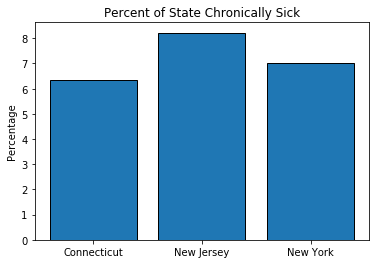

In [106]:
# create graphic to compare chronically sick by state

compare_cs = plt.bar(['Connecticut', 'New Jersey', 'New York'], [pct_cs_conn, pct_cs_nj, pct_cs_ny], edgecolor = 'black')

plt.title('Percent of State Chronically Sick')
plt.ylabel('Percentage')

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [119]:
# 1. Clean data

df = pd.read_csv('case_study.csv', index_col = 0)
SMOK2_to_HLTH = df[['SMOKDAY2', 'PHYSHLTH','_STATE']] # grab only the columns we want
SMOK2_to_HLTH

# copied and pasted from before - just changes 88 to 0 and drops 77s and 99s according to the PHYSHLTH column
SMOK2_to_HLTH['PHYSHLTH'].replace(to_replace = 88, value = 0, inplace = True) # ones with 88 have not taken any days off
print(f'Number of values after changing values of 88 to 0: {SMOK2_to_HLTH.shape}')

index_of_99 = SMOK2_to_HLTH['PHYSHLTH'].index[SMOK2_to_HLTH['PHYSHLTH'] == 99] # which ones are 99
SMOK2_to_HLTH.drop(index_of_99, 0, inplace = True) # drop those because they refused to answer
print(f'Number of values after removing values of 99: {SMOK2_to_HLTH.shape}')

index_of_77 = SMOK2_to_HLTH['PHYSHLTH'].index[SMOK2_to_HLTH['PHYSHLTH'] == 77] # which indices are 77
SMOK2_to_HLTH.drop(index_of_77, 0, inplace = True) # drop those values because they don't know
print(f'Number of values after removing values of 77: {SMOK2_to_HLTH.shape}')

SMOK2_to_HLTH.head() # check what this looks like. doesn't really help anything

SMOK2_to_HLTH['SMOKDAY2'].unique() # check what SMOKDAY2 has
# it contains only array([nan,  3.,  1.,  2.,  9.,  7.])
# which are all the options indicated on the pdf
# we don't want missing values because that doesn't tell us anything

print(f'\nThe number of values before removing NaN values are: {SMOK2_to_HLTH.shape}')
SMOK2_to_HLTH.dropna(axis = 0, inplace = True)
print(f'The number of values before removing NaN values are: {SMOK2_to_HLTH.shape}')

# we probably also don't want the ones who don't know (7) or refused to answer (9). 
# safer to not make assumptions. we can drop those too. only a few, relatively


index_7 = SMOK2_to_HLTH.index[SMOK2_to_HLTH['SMOKDAY2'] == 7] # find the indices where SMOKDAY2 = 7 to drop
SMOK2_to_HLTH.drop(index_7, 0, inplace = True)
print(f'The number of values after removing rows with values of 7 from SMOKDAY2 are: {SMOK2_to_HLTH.shape}')

index_9 = SMOK2_to_HLTH.index[SMOK2_to_HLTH['SMOKDAY2'] == 9] # find the indices where SMOKDAY2 = 7 to drop
SMOK2_to_HLTH.drop(index_9, 0, inplace = True)
print(f'The number of values after removing rows with values of 9 from SMOKDAY2 are: {SMOK2_to_HLTH.shape}')

SMOK2_to_HLTH

Number of values after changing values of 88 to 0: (34545, 3)
Number of values after removing values of 99: (34240, 3)
Number of values after removing values of 77: (33747, 3)

The number of values before removing NaN values are: (33747, 3)
The number of values before removing NaN values are: (13468, 3)
The number of values after removing rows with values of 7 from SMOKDAY2 are: (13462, 3)
The number of values after removing rows with values of 9 from SMOKDAY2 are: (13441, 3)


/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SMOKDAY2,PHYSHLTH,_STATE
49942,3.0,0.0,9.0
49944,3.0,0.0,9.0
49946,3.0,28.0,9.0
49951,3.0,0.0,9.0
49954,3.0,0.0,9.0
...,...,...,...
303768,3.0,0.0,36.0
303769,3.0,10.0,36.0
303773,3.0,2.0,36.0
303774,1.0,0.0,36.0


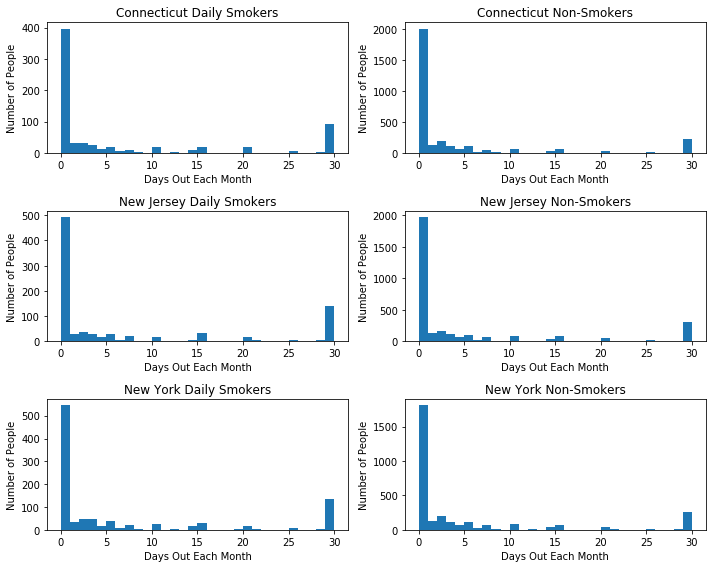

In [179]:
# splitting data by state
## people who smoke every day

CT_S2_H = SMOK2_to_HLTH[SMOK2_to_HLTH['_STATE'] == 9].drop(columns = '_STATE')
NJ_S2_H = SMOK2_to_HLTH[SMOK2_to_HLTH['_STATE'] == 34].drop(columns = '_STATE')
NY_S2_H = SMOK2_to_HLTH[SMOK2_to_HLTH['_STATE'] == 36].drop(columns = '_STATE')

plt.figure(figsize = (10,8))

plt.subplot(3,2,1)
plt.hist(CT_S2_H['PHYSHLTH'][CT_S2_H['SMOKDAY2'] == 1], bins = 30) # people in connecticut who smoke every day
plt.title('Connecticut Daily Smokers')
plt.xlabel('Days Out Each Month')
plt.ylabel('Number of People')

plt.subplot(3,2,3)
plt.hist(NJ_S2_H['PHYSHLTH'][NJ_S2_H['SMOKDAY2'] == 1], bins = 30) # people in new jersey who smoke every day
plt.title('New Jersey Daily Smokers')
plt.xlabel('Days Out Each Month')
plt.ylabel('Number of People')

plt.subplot(3,2,5)
plt.hist(NY_S2_H['PHYSHLTH'][NY_S2_H['SMOKDAY2'] == 1], bins = 30) # people in new york who smoke every day
plt.title('New York Daily Smokers')
plt.xlabel('Days Out Each Month')
plt.ylabel('Number of People')

## people who don't smoke

plt.subplot(3,2,2)
plt.hist(CT_S2_H['PHYSHLTH'][CT_S2_H['SMOKDAY2'] == 3], bins = 30) # people in connecticut who smoke every day
plt.title('Connecticut Non-Smokers')
plt.xlabel('Days Out Each Month')
plt.ylabel('Number of People')

plt.subplot(3,2,4)
plt.hist(NJ_S2_H['PHYSHLTH'][NJ_S2_H['SMOKDAY2'] == 3], bins = 30) # people in new jersey who smoke every day
plt.title('New Jersey Non-Smokers')
plt.xlabel('Days Out Each Month')
plt.ylabel('Number of People')

plt.subplot(3,2,6)
plt.hist(NY_S2_H['PHYSHLTH'][NY_S2_H['SMOKDAY2'] == 3], bins = 30) # people in new york who smoke every day
plt.title('New York Non-Smokers')
plt.xlabel('Days Out Each Month')
plt.ylabel('Number of People')

plt.tight_layout()


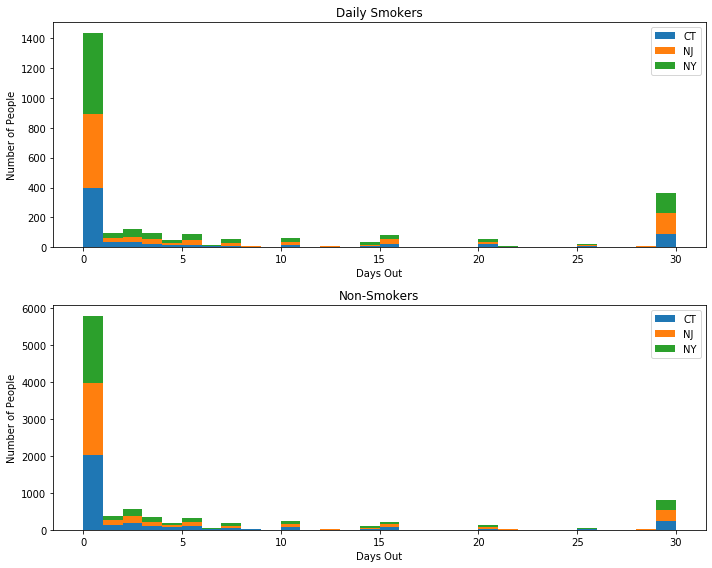

In [186]:
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.hist([CT_S2_H['PHYSHLTH'][CT_S2_H['SMOKDAY2'] == 1], 
         NJ_S2_H['PHYSHLTH'][NJ_S2_H['SMOKDAY2'] == 1], 
         NY_S2_H['PHYSHLTH'][NY_S2_H['SMOKDAY2'] == 1]],
         bins = 30, histtype = 'bar', stacked = True)
plt.title('Daily Smokers')
plt.legend(['CT', 'NJ', 'NY'])
plt.xlabel('Days Out')
plt.ylabel('Number of People')

plt.subplot(2,1,2)
plt.hist([CT_S2_H['PHYSHLTH'][CT_S2_H['SMOKDAY2'] == 3], 
         NJ_S2_H['PHYSHLTH'][NJ_S2_H['SMOKDAY2'] == 3], 
         NY_S2_H['PHYSHLTH'][NY_S2_H['SMOKDAY2'] == 3]],
         bins = 30, histtype = 'bar', stacked = True)
plt.title('Non-Smokers')
plt.legend(['CT', 'NJ', 'NY'])
plt.xlabel('Days Out')
plt.ylabel('Number of People')

plt.tight_layout()

In [ ]:
# putting data into various bar graphs

# graph which ones are 


## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  